In [1]:
import pandas as pd
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv("TATAMOTORS.csv")

In [21]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,TELCO,EQ,379.80,378.00,380.0,377.50,NaN,380.00,378.94,7800,2.955715e+11,NaN,NaN,NaN
1,1996-01-02,TELCO,EQ,380.00,380.00,383.9,376.00,NaN,377.80,380.09,19350,7.354800e+11,NaN,NaN,NaN
2,1996-01-03,TELCO,EQ,377.80,377.80,380.0,376.25,NaN,376.55,378.43,5700,2.157065e+11,NaN,NaN,NaN
3,1996-01-04,TELCO,EQ,376.55,376.55,377.0,371.50,NaN,373.70,374.62,20100,7.529930e+11,NaN,NaN,NaN
4,1996-01-05,TELCO,EQ,373.70,373.70,374.8,371.00,NaN,372.35,372.60,12000,4.471250e+11,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6350 entries, 0 to 6349
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6350 non-null   object 
 1   Symbol              6350 non-null   object 
 2   Series              6350 non-null   object 
 3   Prev Close          6350 non-null   float64
 4   Open                6350 non-null   float64
 5   High                6350 non-null   float64
 6   Low                 6350 non-null   float64
 7   Last                5802 non-null   float64
 8   Close               6350 non-null   float64
 9   VWAP                6350 non-null   float64
 10  Volume              6350 non-null   int64  
 11  Turnover            6350 non-null   float64
 12  Trades              2501 non-null   float64
 13  Deliverable Volume  4838 non-null   float64
 14  %Deliverble         4838 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 744.3

In [23]:
df["Date"] = pd.to_datetime(df["Date"])

In [24]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,TELCO,EQ,379.80,378.00,380.0,377.50,NaN,380.00,378.94,7800,2.955715e+11,NaN,NaN,NaN
1,1996-01-02,TELCO,EQ,380.00,380.00,383.9,376.00,NaN,377.80,380.09,19350,7.354800e+11,NaN,NaN,NaN
2,1996-01-03,TELCO,EQ,377.80,377.80,380.0,376.25,NaN,376.55,378.43,5700,2.157065e+11,NaN,NaN,NaN
3,1996-01-04,TELCO,EQ,376.55,376.55,377.0,371.50,NaN,373.70,374.62,20100,7.529930e+11,NaN,NaN,NaN
4,1996-01-05,TELCO,EQ,373.70,373.70,374.8,371.00,NaN,372.35,372.60,12000,4.471250e+11,NaN,NaN,NaN


In [25]:
df.index = df["Date"]

In [26]:
filtered_col= ["Open", "High", "Low", "Close", "Volume"]

filtered_data = df[filtered_col]

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

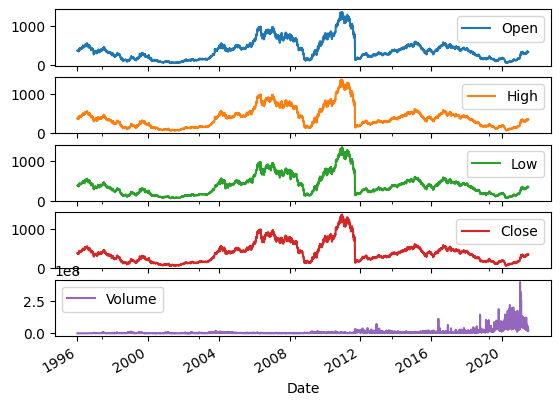

In [27]:
filtered_data.plot(subplots=True)

In [28]:
filtered_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,6350.0,3.930662e+02,2.569456e+02,58.00,1.806125e+02,352.000,498.000,1.361000e+03
High,6350.0,3.998039e+02,2.607175e+02,60.70,1.840000e+02,358.375,505.225,1.382000e+03
Low,6350.0,3.854400e+02,2.523789e+02,57.55,1.755875e+02,345.200,490.000,1.347000e+03
Close,6350.0,3.923948e+02,2.565293e+02,58.80,1.798250e+02,352.525,496.825,1.365150e+03
Volume,6350.0,9.273376e+06,2.050424e+07,5550.00,1.297082e+06,3281258.000,7644675.000,3.905778e+08


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_data[['Open', 'High', 'Low', 'Volume', 'Close']])

scaled_data_df = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Volume', 'Close'])

scaled_data_df.index =  df["Date"]

filtered_data = scaled_data_df

In [30]:
filtered_data

,Open,High,Low,Volume,Close
Date,,,,,
1996-01-01,0.245587,0.241656,0.248129,5.760777e-06,0.245876
1996-01-02,0.247122,0.244608,0.246966,3.533277e-05,0.244192
1996-01-03,0.245434,0.241656,0.247160,3.840518e-07,0.243235
1996-01-04,0.244474,0.239385,0.243476,3.725303e-05,0.241053
1996-01-05,0.242287,0.237720,0.243088,1.651423e-05,0.240020
...,...,...,...,...,...
2021-06-25,0.213277,0.213502,0.215867,5.740500e-02,0.214988
2021-06-28,0.217038,0.215167,0.217147,4.567253e-02,0.217400
2021-06-29,0.218457,0.216302,0.218737,5.749703e-02,0.216443


In [31]:
fft = tf.signal.rfft(filtered_data["Close"])
f_per_dataset = np.arange(0, len(fft))

In [32]:
n_samples = len(filtered_data["Close"])
days_per_year = 365
years_per_dataset = n_samples/days_per_year

f_per_year = f_per_dataset / years_per_dataset


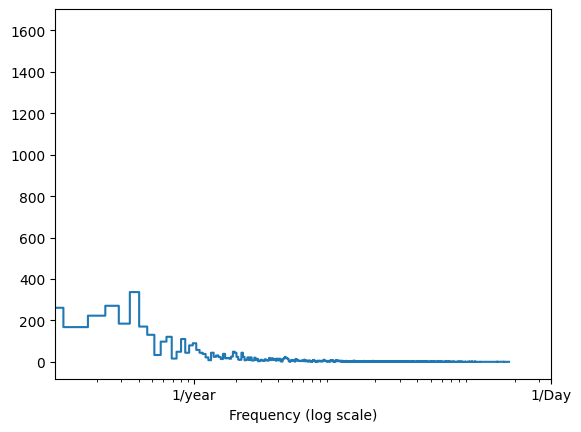

In [34]:
plt.step(f_per_year, np.abs(fft))
plt.xscale("log")

plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels= ['1/year', '1/Day'])
_ = plt.xlabel('Frequency (log scale)')

In [35]:
n = len(filtered_data)
train_df = filtered_data[0:int(n*0.7)]
val_df = filtered_data[int(n*0.7):int(n*0.9)]
test_df = filtered_data[int(n*0.9):]

In [36]:
train_df.head()

,Open,High,Low,Volume,Close
Date,,,,,
1996-01-01,0.245587,0.241656,0.248129,5.760777e-06,0.245876
1996-01-02,0.247122,0.244608,0.246966,3.533277e-05,0.244192
1996-01-03,0.245434,0.241656,0.247160,3.840518e-07,0.243235
1996-01-04,0.244474,0.239385,0.243476,3.725303e-05,0.241053
1996-01-05,0.242287,0.237720,0.243088,1.651423e-05,0.240020


<Axes: xlabel='Date'>

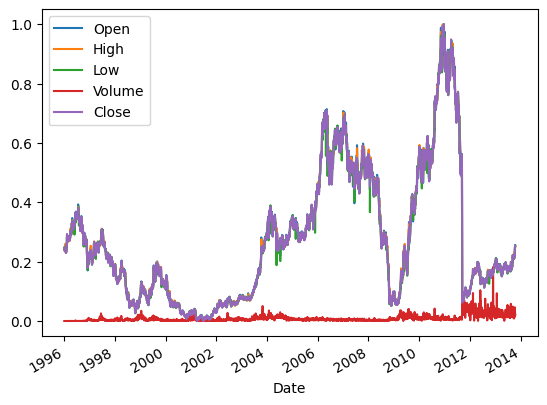

In [37]:
train_df.plot()

In [38]:
train_df.columns

Index(['Open', 'High', 'Low', 'Volume', 'Close'], dtype='object')

In [39]:
columns = ['Close']

In [40]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df = train_df, 
                 val_df = val_df, test_df=test_df, label_columns = None):
        self.train_df = train_df
        self.test_df = test_df
        self.val_df = val_df 
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.outer_width = self.input_width + self.shift
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
        self.column_indices = {name : i for i, name in enumerate(train_df.columns)}

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(0, self.outer_width)[self.input_slice]

        self.label_start = self.outer_width - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.labels_indices = np.arange(self.outer_width)[self.labels_slice]

    def __repr__(self) -> str:
        return '\n'.join([
            f'Total window size:{self.outer_width}',
            f'Input indices:{self.input_indices}',
            f'Label indices:{self.labels_indices}',
            f'Label column names:{self.label_columns}'
        ])
    
    def split_windows(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis = -1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype= np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data = data,
            targets = None,
            sequence_length = self.outer_width,
            sequence_stride = 1,
            shuffle = True,
            batch_size = 32
        )
        ds = ds.map(self.split_windows)
        return ds 
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            self._example = result 
        return result
    
    def plot(self, model=None, plot_col='Close', max_subplots=5):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.labels_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.labels_indices, predictions[n, :],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')

In [41]:

data_generator = WindowGenerator(input_width=70, label_width=10, shift=10, train_df=train_df, 
                                 val_df=val_df, test_df=test_df, label_columns=columns)


In [42]:
data_generator

Total window size:80
Input indices:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
Label indices:[70 71 72 73 74 75 76 77 78 79]
Label column names:['Close']

2025-01-22 11:55:14.512856: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


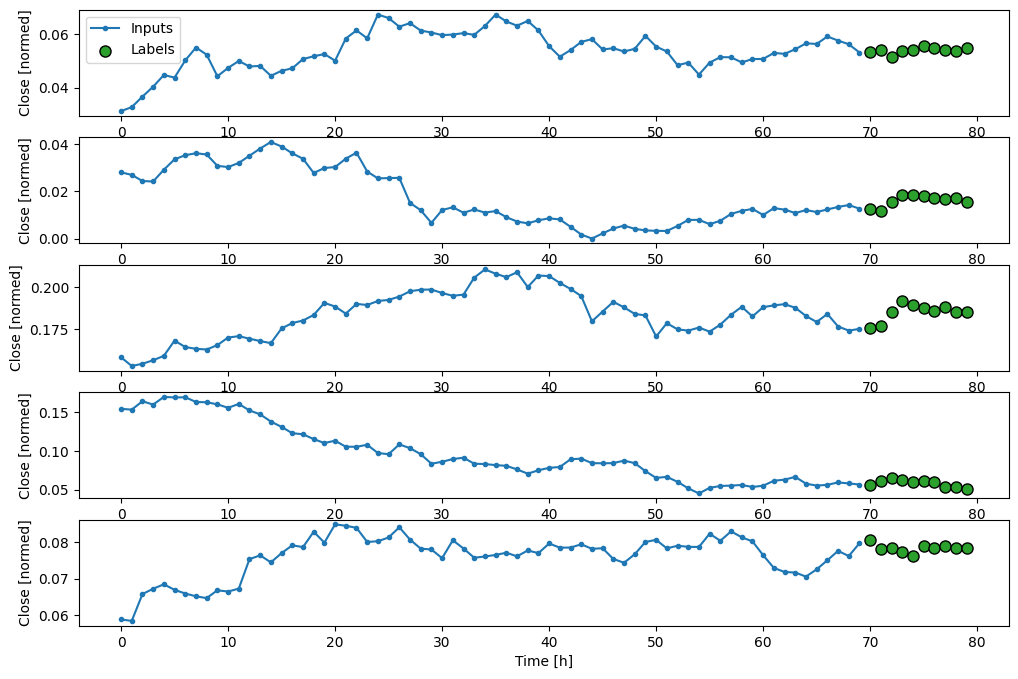

In [43]:
data_generator.plot()

In [44]:
train_data = data_generator.train

In [45]:
for x, y in train_data:
    shape = x
    break

In [46]:
shape[0, :, :]

<tf.Tensor: shape=(70, 5), dtype=float32, numpy=
array([[0.1684574 , 0.16741088, 0.1671643 , 0.00229407, 0.16928847],
       [0.17260168, 0.16816771, 0.17003374, 0.00132447, 0.16764267],
       [0.16895625, 0.16567017, 0.16793981, 0.00167997, 0.16572894],
       [0.1718726 , 0.1682434 , 0.16762961, 0.00082942, 0.16580549],
       [0.16653876, 0.1659729 , 0.16747451, 0.00103208, 0.16771922],
       [0.17037606, 0.17013547, 0.17115824, 0.001713  , 0.1715084 ],
       [0.17340752, 0.17119503, 0.17332971, 0.0011012 , 0.17238872],
       [0.17651573, 0.1735412 , 0.17135213, 0.00108981, 0.168944  ],
       [0.1700307 , 0.16563234, 0.16634999, 0.0011085 , 0.16481034],
       [0.16438986, 0.16181034, 0.16030091, 0.00189837, 0.15895434],
       [0.15905602, 0.15480965, 0.15351507, 0.00258454, 0.15394036],
       [0.15349194, 0.15492319, 0.15467834, 0.00130386, 0.15286867],
       [0.15353031, 0.1628699 , 0.15103339, 0.00214263, 0.16373867],
       [0.16577129, 0.16514039, 0.1593315 , 0.00239636

In [47]:
print('Input shape:', data_generator.example[0].shape)


Input shape: (32, 70, 5)


In [65]:
import mlflow

In [87]:
mlflow.set_experiment("LSTM time series forecasting")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")


def compile(model, window, learning_rate, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  return model
  

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    
                                                    patience=patience,
                                                    mode='min')
  initial_lr = 0.001
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,  # Initial learning rate
    decay_steps=40,                   # Number of steps before decaying
    decay_rate=0.96,                    # Decay rate
    staircase=True                       # Whether to apply decay in discrete steps
  )

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0011),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history, model

def build_model(hp):
  lstm_layer = hp.Int("no_lstm_layer", min_value = 1, max_value = 8, default = 2)
  lstm_neurons = hp.Int("no_lstm_neurons", min_value = 16, max_value = 256)
  learning_rate = hp.Float("learning_rate", min_value = 1e-4, max_value = 1e-2, sampling = "log")
  dense_layer = hp.Int("no_hidden_layer", min_value = 1, max_value = 8, default = 2)
  dense_neurons = hp.Int("no_hidden_neurons", min_value = 50, max_value = 256)
  lstm_model = tf.keras.models.Sequential()
  lstm_model.add(tf.keras.layers.Input(shape=(70,5)))
  for _ in range(lstm_layer):
    lstm_model.add(tf.keras.layers.LSTM(lstm_neurons, return_sequences = True))
    lstm_model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
    lstm_model.add(tf.keras.layers.Dropout(0.2))
  lstm_model.add(tf.keras.layers.LSTM(lstm_neurons, return_sequences = False))

  for _ in range(dense_layer):
    lstm_model.add(tf.keras.layers.Dense(dense_neurons))
  lstm_model.add(tf.keras.layers.Dense(10))
  model = compile(lstm_model, data_generator, learning_rate = learning_rate, patience=6)
  return model

    
     



    
    

In [79]:
x_train, y_train = [], []

for x_batch, y_batch in data_generator.train:
    x_train.append(x_batch.numpy())
    y_train.append(y_batch.numpy())

# Concatenate batches into a single array
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [84]:
import keras_tuner as kt
random_tuner = kt.BayesianOptimization(build_model, objective = "val_mean_absolute_error", max_trials = 6, overwrite = True,
                               directory = "time_series", project_name = "bayesian_search", alpha = 1e-4, beta = 2.6, seed = 12)

random_tuner.search(x_train, y_train, epochs = 5, validation_data = data_generator.val)

Trial 6 Complete [00h 02m 25s]
val_mean_absolute_error: 0.021620113402605057

Best val_mean_absolute_error So Far: 0.014218481257557869
Total elapsed time: 00h 43m 56s


In [85]:
top_3_params = random_tuner.get_best_hyperparameters(num_trials=3)

In [89]:
top_3_params[0].values

{'no_lstm_layer': 1,
 'no_lstm_neurons': 153,
 'learning_rate': 0.001142538296157718,
 'no_hidden_layer': 5,
 'no_hidden_neurons': 118}

In [ ]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(70,5)),
    tf.keras.layers.LSTM(640, return_sequences = True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(640, return_sequences = True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(640, return_sequences = False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])

Epoch 1/6


2025-01-22 17:10:32.740324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2025-01-22 17:10:33.359444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2025-01-22 17:10:33.908523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2025-01-22 17:10:35.439837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2025-01-22 17:10:37.922682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


137/137 [==============================] - ETA: 0s - loss: 0.0043 - mean_absolute_error: 0.0341

2025-01-22 17:10:59.856604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2025-01-22 17:10:59.983792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2025-01-22 17:11:00.344989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


137/137 [==============================] - 31s 168ms/step - loss: 0.0043 - mean_absolute_error: 0.0341 - val_loss: 4.5503e-04 - val_mean_absolute_error: 0.0170
Epoch 2/6
137/137 [==============================] - 16s 114ms/step - loss: 0.0013 - mean_absolute_error: 0.0220 - val_loss: 5.6466e-04 - val_mean_absolute_error: 0.0193
Epoch 3/6
137/137 [==============================] - 16s 116ms/step - loss: 0.0013 - mean_absolute_error: 0.0220 - val_loss: 4.8283e-04 - val_mean_absolute_error: 0.0170
Epoch 4/6
137/137 [==============================] - 16s 115ms/step - loss: 0.0014 - mean_absolute_error: 0.0235 - val_loss: 5.8213e-04 - val_mean_absolute_error: 0.0195
Epoch 5/6
137/137 [==============================] - 16s 115ms/step - loss: 0.0013 - mean_absolute_error: 0.0221 - val_loss: 3.1000e-04 - val_mean_absolute_error: 0.0134
Epoch 6/6
137/137 [==============================] - 16s 116ms/step - loss: 0.0014 - mean_absolute_error: 0.0231 - val_loss: 3.0279e-04 - val_mean_absolute_erro

2025/01/22 17:12:22 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /var/folders/wd/dbl2336d4hnbtpvp4ynqgs3m0000gn/T/tmp7fpjrpd2/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/wd/dbl2336d4hnbtpvp4ynqgs3m0000gn/T/tmp7fpjrpd2/model/data/model/assets
2025/01/22 17:12:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/22 17:12:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run aged-newt-951 at: http://127.0.0.1:5000/#/experiments/612017114304973343/runs/45eea10e9ee742cbb3b3e224ad4c6824.
2025/01/22 17:12:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/612017114304973343.


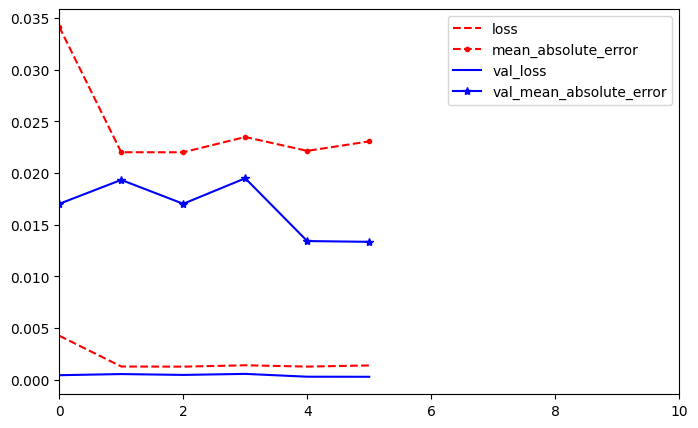

In [91]:
with mlflow.start_run():
    MAX_EPOCHS = 6
    mlflow.log_param("epochs", MAX_EPOCHS)
    mlflow.log_param("batch_size", 32)
    lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(70,5)),
    tf.keras.layers.LSTM(640, return_sequences = True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(640, return_sequences = False),
    tf.keras.layers.Dense(118),
    tf.keras.layers.Dense(118),
    tf.keras.layers.Dense(118),
    tf.keras.layers.Dense(118),
    tf.keras.layers.Dense(118),
    tf.keras.layers.Dense(10),
])
    history, model = compile_and_fit(lstm_model, data_generator, patience=6)
    for epoch, metrics in enumerate(history.history["val_loss"]):
      mlflow.log_metric("val_loss", metrics, step=epoch)
      mlflow.log_metric("val_mae", history.history["val_mean_absolute_error"][epoch], step=epoch)
      mlflow.log_metric("train_loss", history.history["loss"][epoch], step=epoch)
      mlflow.log_metric("train_mae", history.history["mean_absolute_error"][epoch], step=epoch)
    mlflow.keras.log_model(model, artifact_path="keras-model-tuned")
    pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 10], style=["r--", "r--.", "b-", "b-*"])
    plt.savefig("training_history.png")
    mlflow.log_artifact("training_history.png")

In [59]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 70, 640)           1653760   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 70, 640)           0         
                                                                 
 dropout_3 (Dropout)         (None, 70, 640)           0         
                                                                 
 lstm_4 (LSTM)               (None, 70, 640)           3279360   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 70, 640)           0         
                                                                 
 dropout_4 (Dropout)         (None, 70, 640)           0         
                                                                 
 lstm_5 (LSTM)               (None, 640)              

In [74]:

history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

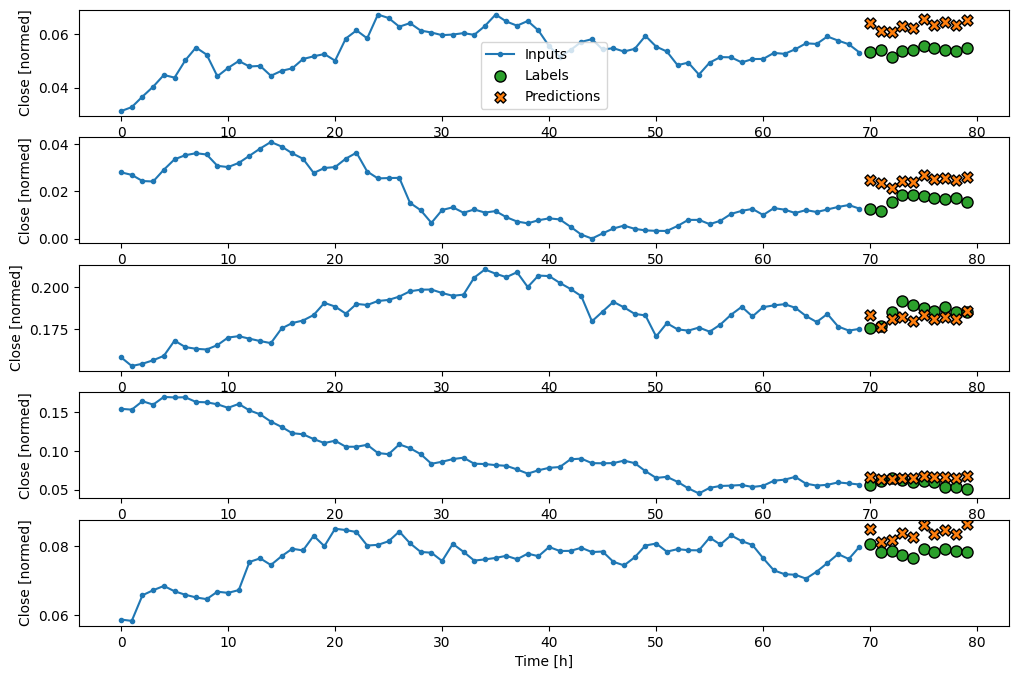

In [93]:
data_generator.plot(model=model)

In [75]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Tata Power Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Tata Power Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Tata Power Stock Price')
    plt.title('Tata Power Stock Price Prediction')
    plt.legend()
    plt.show()